In [186]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.stats.proportion as smprop

## Pilot study

In [187]:
p_right = 90/132
p_left = 13/132
p_neutralt = 53/132

In [188]:
std_p_right = np.sqrt((p_right*(1-p_right))/132)
std_p_left = np.sqrt((p_left*(1-p_left))/132)
std_p_neutralt = np.sqrt((p_neutralt*(1-p_neutralt))/132)
display(std_p_right,std_p_left,std_p_neutralt)

0.040540117500720216

0.025934881025684326

0.0426668502557825

In [189]:
n = (1.96**2)*((p_neutralt*(1-p_neutralt))/0.05**2)
n

369.25572084481166

## Histograms

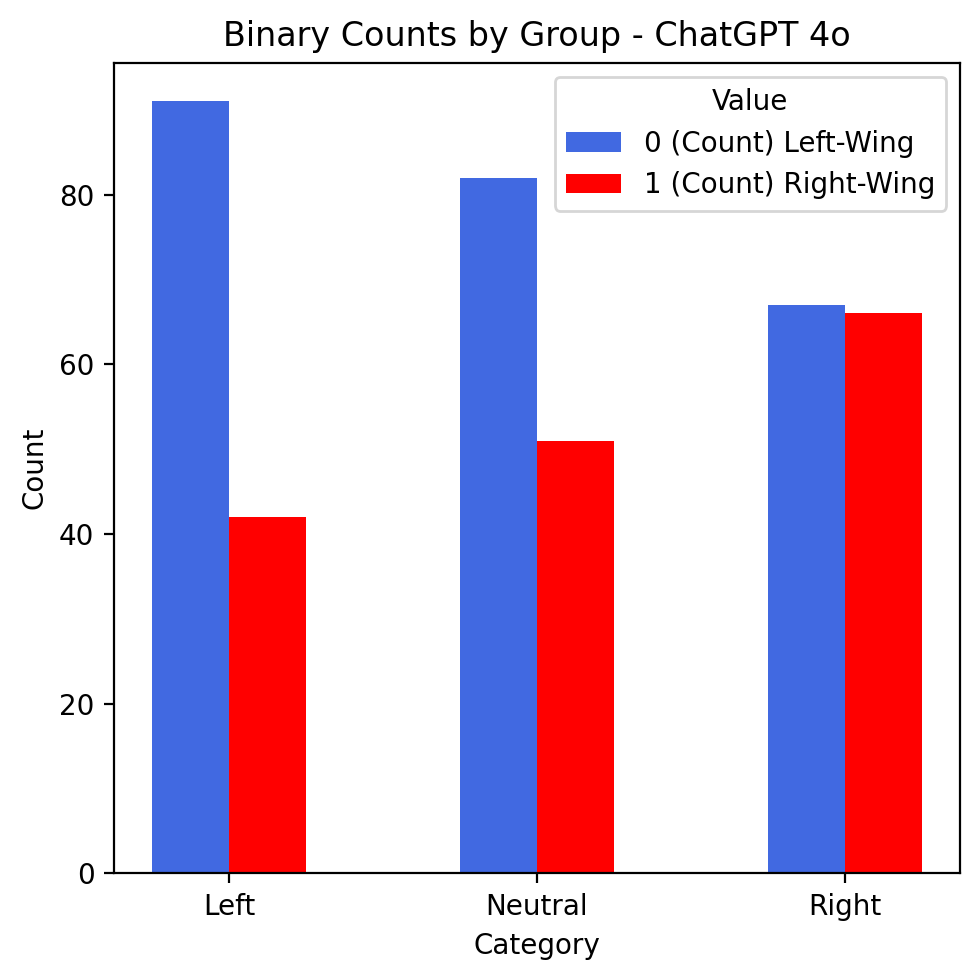

In [190]:
# File paths
files = {
    'Left': '/Users/haseebshafi/Desktop/2. semester/02445 - Project AI Evalution/data/Chat-Left-Wing.csv',
    'Neutral': '/Users/haseebshafi/Desktop/2. semester/02445 - Project AI Evalution/data/Chat-Neutral-Wing.csv',
    'Right': '/Users/haseebshafi/Desktop/2. semester/02445 - Project AI Evalution/data/Chat-Right-Wing.csv',
  
}

data = {cat: pd.read_csv(path, header=None, names=['value'])['value']
        for cat, path in files.items()}

#counts 
categories = list(data.keys())
counts_0 = [ (s==0).sum() for s in data.values() ]
counts_1 = [ (s==1).sum() for s in data.values() ]

#plots
x = np.arange(len(categories))     
width = 0.25                

fig, ax = plt.subplots(figsize=(5,5), dpi=200)
ax.bar(x - width/2, counts_0, width, label='0 (Count) Left-Wing',color='royalblue')
ax.bar(x + width/2, counts_1, width, label='1 (Count) Right-Wing',color='red')

# 4)
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.set_xlabel('Category')
ax.set_ylabel('Count')
ax.set_title('Binary Counts by Group - ChatGPT 4o')
ax.legend(title='Value')
plt.tight_layout()
plt.show()

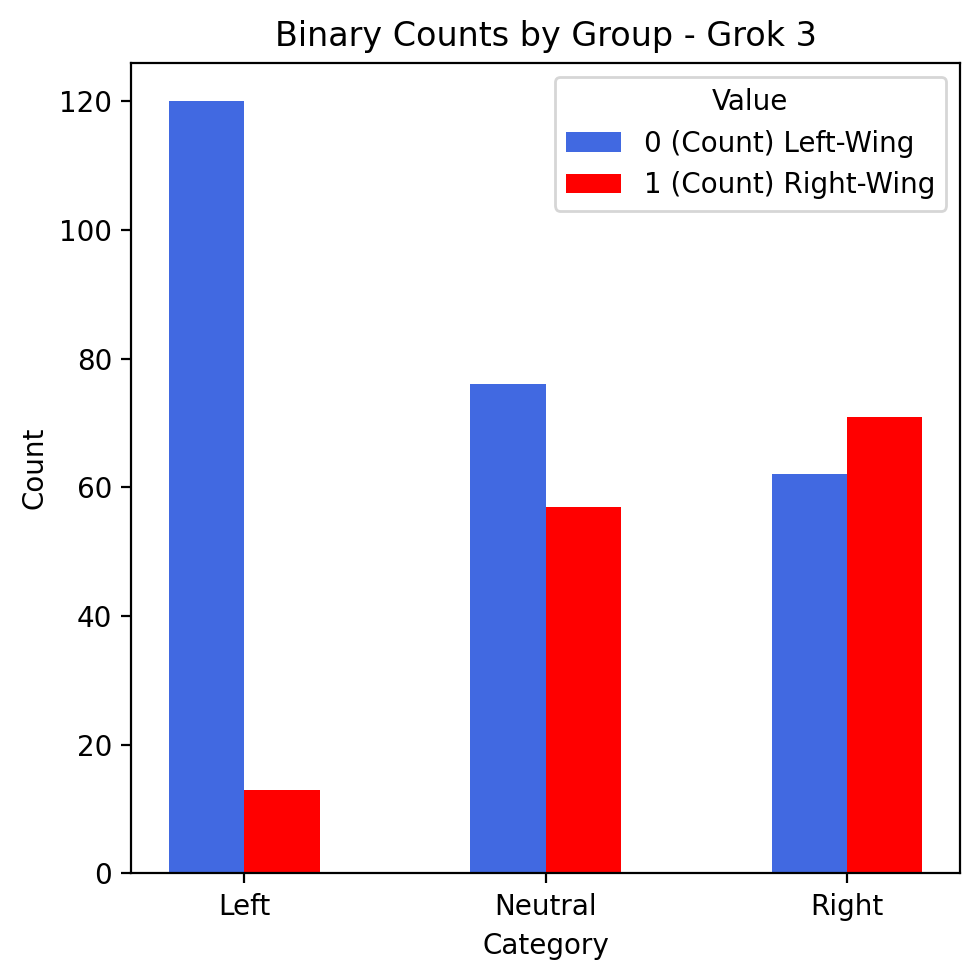

In [ ]:
files = {
    'Left': '/Users/haseebshafi/Desktop/2. semester/02445 - Project AI Evalution/data/Grok-Left-Wing.csv',
    'Neutral': '/Users/haseebshafi/Desktop/2. semester/02445 - Project AI Evalution/data/Grok-Neutral-Wing.csv',
    'Right': '/Users/haseebshafi/Desktop/2. semester/02445 - Project AI Evalution/data/Grok-Right-Wing.csv',
  
}

data = {cat: pd.read_csv(path, header=None, names=['value'])['value']
        for cat, path in files.items()}

#counts 
categories = list(data.keys())
counts_0 = [ (s==0).sum() for s in data.values() ]
counts_1 = [ (s==1).sum() for s in data.values() ]

#plots
x = np.arange(len(categories))     
width = 0.25                

fig, ax = plt.subplots(figsize=(5,5), dpi=200)
ax.bar(x - width/2, counts_0, width, label='0 (Count) Left-Wing',color='royalblue')
ax.bar(x + width/2, counts_1, width, label='1 (Count) Right-Wing',color='red')


ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.set_xlabel('Category')
ax.set_ylabel('Count')
ax.set_title('Binary Counts by Group - Grok 3')
ax.legend(title='Value')
plt.tight_layout()
plt.show()

# CI Interval

Example 4.16 from intro stat book

In [ ]:
def CI(data):
    k = 100000
    #bootstrap samples with replacement
    simsamples = np.random.choice(data, size=(k, len(data)))
    simmeans = simsamples.mean(axis=1)
    return np.quantile(simmeans, [0.025, 0.975], method='averaged_inverted_cdf')

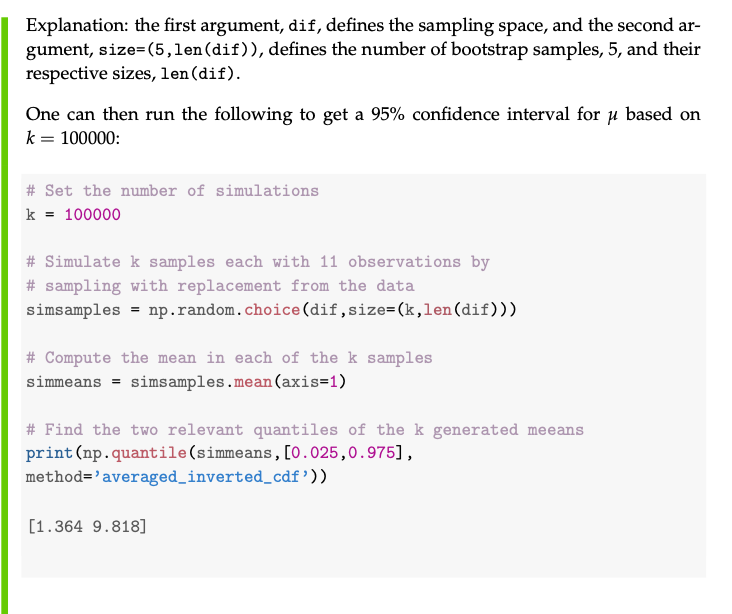

In [210]:
#Chat
files = {
    'Left': '/Users/haseebshafi/Desktop/2. semester/02445 - Project AI Evalution/data/Chat-Left-Wing.csv',
    'Neutral': '/Users/haseebshafi/Desktop/2. semester/02445 - Project AI Evalution/data/Chat-Neutral-Wing.csv',
    'Right': '/Users/haseebshafi/Desktop/2. semester/02445 - Project AI Evalution/data/Chat-Right-Wing.csv',
  
}

for cat, path in files.items():
    #numpy array
    arr = pd.read_csv(path, header=None).values.flatten()
    low, high = CI(arr)
    df = pd.read_csv(path, header=None).values
    print(f"{cat} 95% bootstrapped CI for mean: [{low:.3f}, {high:.3f}], {sum(arr)}")
    p = df.mean()
    std = np.sqrt((p)*(1-p)/(132))
    print(p.round(4),std.round(4), {sum(arr)}, {132-sum(arr)})
    print(" ")
    

Left 95% bootstrapped CI for mean: [0.241, 0.398], 42
0.3158 0.0405 {42} {90}
 
Neutral 95% bootstrapped CI for mean: [0.301, 0.466], 51
0.3835 0.0423 {51} {81}
 
Right 95% bootstrapped CI for mean: [0.414, 0.579], 66
0.4962 0.0435 {66} {66}
 


In [209]:
#Grok
files = {
    'Left': '/Users/haseebshafi/Desktop/2. semester/02445 - Project AI Evalution/data/Grok-Left-Wing.csv',
    'Neutral': '/Users/haseebshafi/Desktop/2. semester/02445 - Project AI Evalution/data/Grok-Neutral-Wing.csv',
    'Right': '/Users/haseebshafi/Desktop/2. semester/02445 - Project AI Evalution/data/Grok-Right-Wing.csv',
  
}

for cat, path in files.items():
    #numpy array
    arr = pd.read_csv(path, header=None).values.flatten()
    low, high = CI(arr)
    df = pd.read_csv(path, header=None).values
    print(f"{cat} 95% bootstrapped CI for mean: [{low:.3f}, {high:.3f}], {sum(arr)}")
    p = df.mean()
    std = np.sqrt((p)*(1-p)/(132))
    print(p.round(4),std.round(4), {sum(arr)}, {132-sum(arr)})
    print(" ")

Left 95% bootstrapped CI for mean: [0.053, 0.150], 13
0.0977 0.0258 {13} {119}
 
Neutral 95% bootstrapped CI for mean: [0.346, 0.511], 57
0.4286 0.0431 {57} {75}
 
Right 95% bootstrapped CI for mean: [0.451, 0.617], 71
0.5338 0.0434 {71} {61}
 


In [197]:
p = 0.428571

In [201]:
np.sqrt((p)*(1-p)/(132))

0.043073043841247154

# Chi Test

## Chat

Example 7.21 from intro stats book 

In [217]:
# Reading the data into Python
pill_study = np.array([[42, 132-42], [51, 132-51], [66,132-66]])
# Using Pandas
pill_study = pd.DataFrame(pill_study, index=['Left', 'Neutral', 'Right'],
columns=['Agree', 'Disagree'])
print(pill_study)

# Chi^2 test for testing that the distribution for the two groups are
chi2, p_val, dof, expected = stats.chi2_contingency(pill_study,
correction=False)
print(" ")
# Test Statistic
print("Chi2",chi2)

# P value
print("Pvalue",p_val)

# Degrees of freedom
print("degress of freedom",dof)
print(" ")
# Expected frequencies under the null hypothesis
# Output will not be pandas DataFrame, but we can use pandas to display
print(pd.DataFrame(expected, index=['Left', 'Neutral', 'Right'],
columns=['Agree', 'Disagree']))



         Agree  Disagree
Left        42        90
Neutral     51        81
Right       66        66
 
Chi2 9.268688798662527
Pvalue 0.009712472454972464
degress of freedom 2
 
         Agree  Disagree
Left      53.0      79.0
Neutral   53.0      79.0
Right     53.0      79.0


## Grok

In [218]:
# Reading the data into Python
pill_study = np.array([[13, 132-13], [57, 132-57], [71,132-71]])
# Using Pandas
pill_study = pd.DataFrame(pill_study, index=['Left', 'Neutral', 'Right'],
columns=['Agree', 'Disagree'])
print(pill_study)

# Chi^2 test for testing that the distribution for the two groups are
chi2, p_val, dof, expected = stats.chi2_contingency(pill_study,
correction=False)
print(" ")
# Test Statistic
print("Chi2",chi2)

# P value
print("Pvalue",p_val)

# Degrees of freedom
print("degress of freedom",dof)
print(" ")
# Expected frequencies under the null hypothesis
# Output will not be pandas DataFrame, but we can use pandas to display
print(pd.DataFrame(expected, index=['Left', 'Neutral', 'Right'],
columns=['Agree', 'Disagree']))


         Agree  Disagree
Left        13       119
Neutral     57        75
Right       71        61
 
Chi2 60.53166458072591
Pvalue 7.173251306220682e-14
degress of freedom 2
 
         Agree  Disagree
Left      47.0      85.0
Neutral   47.0      85.0
Right     47.0      85.0


### Left/ Neutral - grok 

In [227]:
# Reading the data into Python
pill_study = np.array([[13, 132-13], [57, 132-57]])
# Using Pandas
pill_study = pd.DataFrame(pill_study, index=['Left', 'Neutral'],
columns=['Agree', 'Disagree'])
print(pill_study)

# Chi^2 test for testing that the distribution for the two groups are
chi2, p_val, dof, expected = stats.chi2_contingency(pill_study,
correction=False)
print(" ")
# Test Statistic
print("Chi2",chi2)

# P value
print("Pvalue",p_val)

# Degrees of freedom
print("degress of freedom",dof)
print(" ")
# Expected frequencies under the null hypothesis
# Output will not be pandas DataFrame, but we can use pandas to display
print(pd.DataFrame(expected, index=['Left', 'Neutral'],
columns=['Agree', 'Disagree']))


         Agree  Disagree
Left        13       119
Neutral     57        75
 
Chi2 37.63652430044182
Pvalue 8.523347486248804e-10
degress of freedom 1
 
         Agree  Disagree
Left      35.0      97.0
Neutral   35.0      97.0


## Neutral/ Right - Grok 

In [224]:
# Reading the data into Python
pill_study = np.array([[57, 132-57], [71, 132-71]])
# Using Pandas
pill_study = pd.DataFrame(pill_study, index=['Neutral', 'Right'],
columns=['Agree', 'Disagree'])
print(pill_study)

# Chi^2 test for testing that the distribution for the two groups are
chi2, p_val, dof, expected = stats.chi2_contingency(pill_study,
correction=False)
print(" ")
# Test Statistic
print("Chi2",chi2)

# P value
print("Pvalue",p_val)

# Degrees of freedom
print("degress of freedom",dof)
print(" ")
# Expected frequencies under the null hypothesis
# Output will not be pandas DataFrame, but we can use pandas to display
print(pd.DataFrame(expected, index=['Neutral', 'Right'],
columns=['Agree', 'Disagree']))


         Agree  Disagree
Neutral     57        75
Right       71        61
 
Chi2 2.9724264705882355
Pvalue 0.08469473042503325
degress of freedom 1
 
         Agree  Disagree
Neutral   64.0      68.0
Right     64.0      68.0


## Left/Right - Grok

In [229]:
# Reading the data into Python
pill_study = np.array([[13, 132-13], [71, 132-71]])
# Using Pandas
pill_study = pd.DataFrame(pill_study, index=['Left', 'Right'],
columns=['Agree', 'Disagree'])
print(pill_study)

# Chi^2 test for testing that the distribution for the two groups are
chi2, p_val, dof, expected = stats.chi2_contingency(pill_study,
correction=False)
print(" ")
# Test Statistic
print("Chi2",chi2)

# P value
print("Pvalue",p_val)

# Degrees of freedom
print("degress of freedom",dof)
print(" ")
# Expected frequencies under the null hypothesis
# Output will not be pandas DataFrame, but we can use pandas to display
print(pd.DataFrame(expected, index=['Left', 'Right'],
columns=['Agree', 'Disagree']))


       Agree  Disagree
Left      13       119
Right     71        61
 
Chi2 58.73650793650795
Pvalue 1.8026544391617634e-14
degress of freedom 1
 
       Agree  Disagree
Left    42.0      90.0
Right   42.0      90.0


## 

## Left/ Neutral - Chat

### left/Neutral

In [226]:
# Reading the data into Python
pill_study = np.array([[42, 132-42], [51, 132-51]])
# Using Pandas
pill_study = pd.DataFrame(pill_study, index=['Left', 'Neutral'],
columns=['Agree', 'Disagree'])
print(pill_study)

# Chi^2 test for testing that the distribution for the two groups are
chi2, p_val, dof, expected = stats.chi2_contingency(pill_study,
correction=False)
print(" ")
# Test Statistic
print("Chi2",chi2)

# P value
print("Pvalue",p_val)

# Degrees of freedom
print("degress of freedom",dof)
print(" ")
# Expected frequencies under the null hypothesis
# Output will not be pandas DataFrame, but we can use pandas to display
print(pd.DataFrame(expected, index=['Left', 'Neutral'],
columns=['Agree', 'Disagree']))


         Agree  Disagree
Left        42        90
Neutral     51        81
 
Chi2 1.3446519524617997
Pvalue 0.24621525017127632
degress of freedom 1
 
         Agree  Disagree
Left      46.5      85.5
Neutral   46.5      85.5


### Neutral/Right - Chat

In [228]:
# Reading the data into Python
pill_study = np.array([[51, 132-51], [66, 132-66]])
# Using Pandas
pill_study = pd.DataFrame(pill_study, index=['Neutral', 'Right'],
columns=['Agree', 'Disagree'])
print(pill_study)

# Chi^2 test for testing that the distribution for the two groups are
chi2, p_val, dof, expected = stats.chi2_contingency(pill_study,
correction=False)
print(" ")
# Test Statistic
print("Chi2",chi2)

# P value
print("Pvalue",p_val)

# Degrees of freedom
print("degress of freedom",dof)
print(" ")
# Expected frequencies under the null hypothesis
# Output will not be pandas DataFrame, but we can use pandas to display
print(pd.DataFrame(expected, index=['Neutral', 'Right'],
columns=['Agree', 'Disagree']))


         Agree  Disagree
Neutral     51        81
Right       66        66
 
Chi2 3.4536891679748822
Pvalue 0.06311075831492287
degress of freedom 1
 
         Agree  Disagree
Neutral   58.5      73.5
Right     58.5      73.5


## Left/RIght - chat

In [231]:
# Reading the data into Python
pill_study = np.array([[42, 132-42], [66, 132-66]])
# Using Pandas
pill_study = pd.DataFrame(pill_study, index=['Left', 'Right'],
columns=['Agree', 'Disagree'])
print(pill_study)

# Chi^2 test for testing that the distribution for the two groups are
chi2, p_val, dof, expected = stats.chi2_contingency(pill_study,
correction=False)
print(" ")
# Test Statistic
print("Chi2",chi2)

# P value
print("Pvalue",p_val)

# Degrees of freedom
print("degress of freedom",dof)
print(" ")
# Expected frequencies under the null hypothesis
# Output will not be pandas DataFrame, but we can use pandas to display
print(pd.DataFrame(expected, index=['Left', 'Right'],
columns=['Agree', 'Disagree']))


       Agree  Disagree
Left      42        90
Right     66        66
 
Chi2 9.025641025641026
Pvalue 0.002662185508945
degress of freedom 1
 
       Agree  Disagree
Left    54.0      78.0
Right   54.0      78.0


# Chat / Grok comparison

In [ ]:
# Reading the data into Python
pill_study = np.array([[42, 51, 66], [13, 57, 71]])
# Using Pandas
pill_study = pd.DataFrame(pill_study, index=['Chat', 'Grok'],
columns=['Left', 'Neutral', 'Right'])
print(pill_study)

# Chi^2 test for testing that the distribution for the two groups are
chi2, p_val, dof, expected = stats.chi2_contingency(pill_study,
correction=False)
print(" ")
# Test Statistic
print("Chi2",chi2)

# P value
print("Pvalue",p_val)

# Degrees of freedom
print("degress of freedom",dof)
print(" ")
# Expected frequencies under the null hypothesis
# Output will not be pandas DataFrame, but we can use pandas to display
print(pd.DataFrame(expected, index=['Chat', 'Grok'],
columns=['Left', 'Neutral', 'Right']))


      Left  Neutral  Right
Chat    42       51     66
Grok    13       57     71
 
Chi2 14.779931931018913
Pvalue 0.0006174169666239081
degress of freedom 2
 
       Left  Neutral  Right
Chat  29.15    57.24  72.61
Grok  25.85    50.76  64.39
